# Predict the onset of diabetes based on diagnostic measures using ANN
In this exercise we will build a simple ANN for a binary classification problem.   
Kaggle API command to download dataset:     
`kaggle datasets download -d uciml/pima-indians-diabetes-database`

Or Download from here: [https://www.kaggle.com/uciml/pima-indians-diabetes-database/data](https://www.kaggle.com/uciml/pima-indians-diabetes-database/data)

In [1]:
import os
import pandas as pd
from keras.models import Sequential
from keras.layers import Input, Activation, Dense, Dropout, BatchNormalization
from keras.models import Model, load_model
import keras.backend as K
from keras.callbacks import ModelCheckpoint
import numpy as np
from keras import optimizers

/home/geena/anaconda3/envs/DLK2/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/home/geena/anaconda3/envs/DLK2/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [2]:
filename = '/'.join(os.getcwd().split('/')[:-1])+'/data/diabetes.csv' #this is specific to my case. use your own path to the data

df = pd.read_csv(filename)
df.head() #shows the first 5 lines of your data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.info() #shows attributes and their properties. seems there is no null value nor wrong data type such as string value for numbers which sometimes happens

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [3]:
# Create X and Y in numpy array format from pandas dataframe 
Y = np.array(df['Outcome'])
X = np.array(df.drop('Outcome',axis=1))

In [5]:
# Check the X and Y shapes 
print(X.shape, Y.shape)

(768, 8) (768,)


In [4]:
# YOUR TURN
# Split the dataset to train and test set with the ratio of 80% train and 20% test
# hint : use sklearn train_test_split()
# use naming as X_train, Y_train for train data and X_test, Y_test for test data.

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
# Check (print) the data shape for each
print(X_train.shape,X_test.shape, Y_train.shape, Y_test.shape)

(614, 8) (154, 8) (614,) (154,)


## Build a simple Keras model

Keras is a high-level neural networks API, written in Python and capable of running on top of TensorFlow, CNTK, or Theano. It can work with various software and hardware platforms. You can build and train neural network models easily without having to worry about how to handle those specific software/hardware platforms. For more info, see [Keras documentation](https://keras.io/).

We'll use the `Sequential()` model in Keras. 
The Sequential model is a linear stack of layers. You can create a Sequential model by passing a list of layer instances to the constructor.


```python
from keras.models import Sequential
from keras.layers import Dense, Activation

model = Sequential([
    Dense(32, input_shape=(784,)),
    Activation('relu'),
    Dense(10),
    Activation('softmax'),
])
```
`input_shape=(784,)` means the data has 784 features (Just ignore this number for now).  
Or alternatively, you can add layers using .add() method to the layers object `model`.
```python
model = Sequential()
model.add(Dense(32, input_dim=784))
model.add(Activation('relu'))
```
This works too.
```python
l1 = Dense(32,input_dim=784)
l2 = Activation('relu')

model = Sequential([l1,l2])
```
You can wrap it in a function.
```python
def mymodel():
    model=Sequential()
    model.add(Dense(32,input_dim=784))
    model.add(Activation('relu'))
    model.add(Dense(32))
    model.add(Activation('relu'))
    return model
```

For more info, see [About Keras Sequential Model](https://keras.io/getting-started/sequential-model-guide/).

In [5]:
# YOUR TURN
# build a model with 3 hidden layers (the first hidden layer is already given) and the output layer to classify (binary)
# which activation functions should you use for hidden layers and the output layer?

model = Sequential()
model.add(Dense(16,input_shape=(8,),activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [8]:
# prints out the model summary
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                144       
_________________________________________________________________
dense_2 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_3 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 33        
Total params: 1,777
Trainable params: 1,777
Non-trainable params: 0
_________________________________________________________________


In [6]:
# compile your model
# we use binary cross entropy since this problem is a binary classification problem. 
# let's add accuracy metric to display 
# we use adam optimizer (let's not worry about what is it for now. it's easier to use than other optimizers)
model.compile(optimizer='adam', loss ='binary_crossentropy', metrics=['accuracy'])

In [10]:
# YOUR TURN
# Fit your model on the train data using batch size 32 and for 20 epochs
# hint: use model.fit() function

model.fit(X_train, Y_train, batch_size=32, epochs=20)

Epoch 1/20
614/614 [==============================] - 0s 200us/step - loss: 4.2388 - acc: 0.4577
Epoch 2/20
614/614 [==============================] - 0s 41us/step - loss: 1.0448 - acc: 0.6059
Epoch 3/20
614/614 [==============================] - 0s 51us/step - loss: 0.7533 - acc: 0.6254
Epoch 4/20
614/614 [==============================] - 0s 40us/step - loss: 0.6674 - acc: 0.6384
Epoch 5/20
614/614 [==============================] - 0s 64us/step - loss: 0.6463 - acc: 0.6433
Epoch 6/20
614/614 [==============================] - 0s 41us/step - loss: 0.6172 - acc: 0.6498

In [11]:
# YOUR TURN

# Q1. What was the best accuracy from the above result?
# >> about 0.7 or more

# Q2. What happens if you change epochs? What is your optimal epochs?
# your answer:
# >> the training accuracy continues to go up (see below experiment). 
# >> But without testing a holding out set, I can't tell whether it's overfitting.



In [8]:
model.fit(X_train, Y_train, batch_size=32, epochs=100)

Epoch 1/100
614/614 [==============================] - 0s 60us/step - loss: 0.5335 - acc: 0.7362
Epoch 2/100
614/614 [==============================] - 0s 82us/step - loss: 0.5366 - acc: 0.7231
Epoch 3/100
614/614 [==============================] - 0s 75us/step - loss: 0.5574 - acc: 0.7068
Epoch 4/100
614/614 [==============================] - 0s 62us/step - loss: 0.6057 - acc: 0.6987
Epoch 5/100
614/614 [==============================] - 0s 68us/step - loss: 0.5699 - acc: 0.6987
Epoch 6/100
614/614 [==============================] - 0s 57us/step - loss: 0.5493 - acc: 0.7150

## Have more control over your model hyperparameters
Above example showed how to build a sequential model. As you might know already from machine learning, learning rate is an important hyperparameter for taining. In the above example, `.compile()` used the Adam optimizer by calling the optimizer name `'adam'` (string).  
```python
model.compile(optimizer='adam', loss ='binary_crossentropy', metrics=['accuracy'])
```
Under the hood, if you call the string 'adam', it calls the optimizer Adam (keras.optimizers.Adam) and uses default options (e.g. learning rate is 0.001). Check the [optimizer](https://keras.io/optimizers/) documentation for more details. Since we'd like to control the learning rate, we can instantiate an adam optimizer (and change the learning rate) by
```python
adam = optimizers.Adam(lr=0.005)
```
and use in the `.compile()` 

In [9]:
# YOUR TURN
# instantiate your previous model again without compiling yet,
model = Sequential()
model.add(Dense(16,input_shape=(8,)))
model.add(Activation('relu'))
model.add(Dense(32))
model.add(Activation('relu'))
model.add(Dense(32))
model.add(Activation('relu'))
model.add(Dense(1))
model.add(Activation('sigmoid'))

# instantiate your adam optimizer and change the learning rate to 0.01 and compile
adam = optimizers.Adam(lr=0.01, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(optimizer=adam, loss ='binary_crossentropy', metrics=['accuracy'])

# Note: it's a good idea to wrap models in a function, especially working with jupyter notebook because running cells here and there can mess up.

In [10]:
# YOUR TURN
# fit the model
model.fit(X_train, Y_train, batch_size=32, epochs=200)

Epoch 1/200
614/614 [==============================] - 0s 232us/step - loss: 1.3699 - acc: 0.5554
Epoch 2/200
614/614 [==============================] - 0s 56us/step - loss: 0.7193 - acc: 0.6319
Epoch 3/200
614/614 [==============================] - 0s 42us/step - loss: 0.8356 - acc: 0.6010
Epoch 4/200
614/614 [==============================] - 0s 71us/step - loss: 0.8609 - acc: 0.6205
Epoch 5/200
614/614 [==============================] - 0s 39us/step - loss: 0.6323 - acc: 0.6531
Epoch 6/200
614/614 [==============================] - 0s 48us/step - loss: 0.6288 - acc: 0.6792

In [14]:
# YOUR TURN

# Using your model(s) above, tweak learning rate, epoch, and batch size
# Q3. Observe the relationship between the learning rate and epoch. 
# Q3a. If you reduce the learning rate, what happens to the epochs needed to achieve the same accuracy?
# >> In general, I need longer epochs to reach the same accuracy
# >> But if my learning rate is already too big, longer epochs makes worse result
# Q3b. If you increase the learning rate, at some point does it fail?
# >> Seems too high learning rate (higher than 0.01) makes less performance
# Q3c. Find a sweet spot (may not be unique)
# >> lr around 0.001 works generally well, and the training accuracy increases as epoch increases 
# Q4. Change the number of elements in layers and add more layers. Adjust learning rate, and other hyperparameters as necessary.
# Q4a. What is your best configuation?
# Q4b. What is your best train accuracy?
# >> increasing number of neurons generally increases train accuracy
# >> increasing number of layers (fixed num_neurons) generally increases train accuracy, but not hugely
# >> as model gets bigger, it has more fitting power, so it's natural that train accuracy gets higher, 
# but it deosn't mean that it will generalize better. We'll see i the next questions. 

In [42]:
def model3h(n=[16,32,32]):
    model = Sequential()
    model.add(Dense(n[0],input_shape=(8,)))
    model.add(Activation('relu'))
    model.add(Dense(n[1]))
    model.add(Activation('relu'))
    model.add(Dense(n[2]))
    model.add(Activation('relu'))
    model.add(Dense(1))
    model.add(Activation('sigmoid'))
    return model

def train(model, lr=0.001, batch=32, epochs=20):
    adam = optimizers.Adam(lr=lr) 
    model.compile(optimizer=adam, loss ='binary_crossentropy', metrics=['accuracy'])
    result = model.fit(X_train, Y_train, batch_size=batch, epochs=epochs,verbose=0)
    return result.history

In [41]:
for ep in [10,20,50,100,200]:
    for lr in [0.1,0.01,0.001,0.0001,0.00001]:
        model = model3h()
        res = train(model,lr,32,ep)
        print(ep,lr,np.argmax(res['acc']),'{:.3f}'.format(max(res['acc'])))

10 0.1 1 0.653
10 0.01 3 0.653
10 0.001 8 0.713
10 0.0001 0 0.653
10 1e-05 0 0.653
20 0.1 1 0.653
20 0.01 18 0.731
20 0.001 19 0.730
20 0.0001 19 0.661
20 1e-05 19 0.373
50 0.1 4 0.653
50 0.01 45 0.774
50 0.001 40 0.754
50 0.0001 46 0.708
50 1e-05 49 0.557
100 0.1 0 0.353
100 0.01 98 0.796
100 0.001 93 0.795
100 0.0001 99 0.715
100 1e-05 0 0.632
200 0.1 2 0.653
200 0.01 166 0.809
200 0.001 184 0.844
200 0.0001 195 0.741
200 1e-05 194 0.612


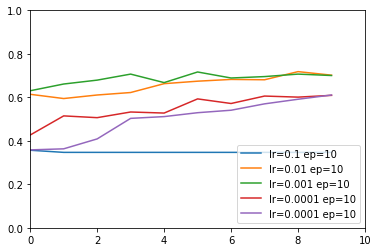

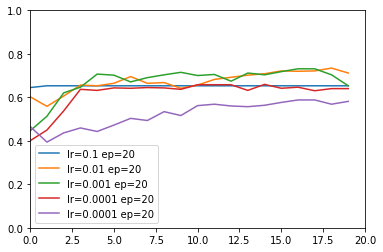

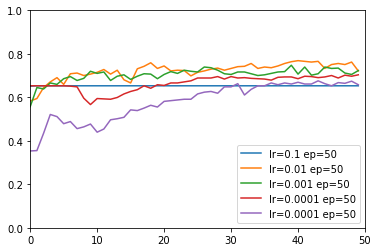

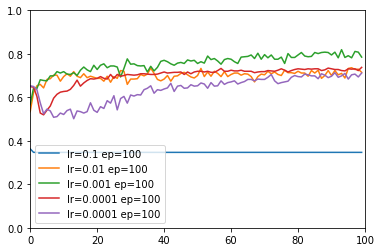

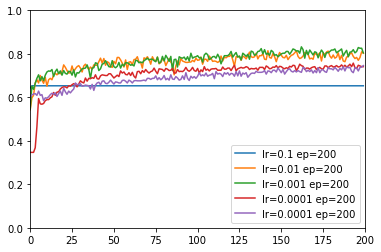

In [38]:
import matplotlib.pyplot as plt
%matplotlib inline

for ep in [10,20,50,100,200]:
    for lr in [0.1,0.01,0.001,0.0001,0.0001]:
        model = model3h()
        res = train(model,lr,32,ep)
        plt.ylim(0,1)
        plt.xlim(0,ep)
        plt.plot(res['acc'],label='lr='+str(lr)+' ep='+str(ep))
        plt.legend()
    plt.show()    

In [53]:
import time ## increasing num_neurons
configs = [[4,4,4],[8,8,8],[16,16,16],[32,16,16],[16,32,32],[32,32,32],[64,64,64],[128,128,128]]
for conf in configs:
    model = model3h(conf)
    t0=time.time()
    res = train(model,lr=0.001,batch=32,epochs=50)
    t1=time.time() #I'm timing to check training time vs model size
    print(conf, '{:.3f}'.format(t1-t0), model.count_params(),np.argmax(res['acc']),'{:.3f}'.format(max(res['acc'])))

[4, 4, 4] 6.885 81 45 0.684
[8, 8, 8] 6.820 225 47 0.697
[16, 16, 16] 7.572 705 49 0.748
[32, 16, 16] 6.996 1105 46 0.757
[16, 32, 32] 6.953 1777 43 0.772
[32, 32, 32] 7.042 2433 46 0.775
[64, 64, 64] 7.213 8961 46 0.770
[128, 128, 128] 7.852 34305 49 0.785


In [55]:
def model_nlayer(n): #fixed num_neuron to 32
    model = Sequential()
    model.add(Dense(32,input_shape=(8,)))
    for i in range(n-1):
        model.add(Dense(32,activation='relu'))
    model.add(Dense(1,activation='sigmoid'))
    return model

for nlayer in [1,3,5,7,9,11]:
    model = model_nlayer(nlayer)
    t0=time.time()
    res = train(model,lr=0.001,batch=32,epochs=50)
    t1=time.time() #I'm timing to check training time vs model size
    print(nlayer, '{:.3f}'.format(t1-t0), model.count_params(),np.argmax(res['acc']),'{:.3f}'.format(max(res['acc'])))

1 7.279 321 42 0.715
3 7.488 2433 42 0.756
5 7.762 4545 42 0.775
7 8.061 6657 40 0.744
9 8.416 8769 49 0.774
11 8.803 10881 48 0.777


## Check the test accuracy

In [58]:
best_train_acc

0.758957654917279

In [61]:
def acc(yp, yt):
    assert yp.shape==yt.shape, 'shape of yp and yt do not match'
    return np.mean(yp == yt)

In [17]:
import tensorflow as tf # an alternative accuracy calculation (what Keras actually uses)

def acc_tf(yp, yt):
    assert yt.shape == yp.shape, "yp and yt shape do not match"
    sess = tf.InteractiveSession()
    acc = K.mean(K.equal(tf.convert_to_tensor(yt), tf.cast(K.round(tf.convert_to_tensor(yp)),dtype=tf.int64))).eval()
    return acc

In [64]:
# YOUR TURN
# print out the accuracy (another way to do it)
y_pred = model.predict(X_test)
Y_class = y_pred.reshape(Y_test.shape).round()
acc(Y_class, Y_test)
# Q5. Is the test accuracy as good as the train accuracy? 
# >> Nope

0.6428571428571429

In [66]:
for ep in [25,50,150]:
    model=model3h()
    adam = optimizers.Adam() 
    model.compile(optimizer=adam, loss ='binary_crossentropy', metrics=['accuracy'])
    res = model.fit(X_train, Y_train, batch_size=32, epochs=25,verbose=0) #model.fit returns an object
    best_train_acc = max(res.history['acc']) #, which you can retrieve metrics if you chose a metric
    metric = model.evaluate(X_test, Y_test, batch_size=32, verbose=0) 
    print(ep, best_train_acc, metric[1])

25 0.7231270358306189 0.6883116859894294
50 0.7231270360247708 0.6298701283219573
150 0.749185667752443 0.6753246784210205


## Monitor validation loss
You can also monitor validation loss and validation metric (accuracy in our example) by adding an option ` validation_split` to the `.fit()` function. 

In [69]:
# YOUR TURN
# Refer to Keras documentation and add validation_split to .fit() 
def model0():
    model = Sequential()
    model.add(Dense(16,input_shape=(8,)))
    model.add(Activation('relu'))
    model.add(Dense(32))
    model.add(Activation('relu'))
    model.add(Dense(32))
    model.add(Activation('relu'))
    model.add(Dense(1))
    model.add(Activation('sigmoid'))
    adam = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
    model.compile(optimizer=adam, loss ='binary_crossentropy', metrics=['accuracy'])    
    return model
model = model0()
res = model.fit(X_train, Y_train, validation_split=0.33, epochs=500, batch_size=32)
# Q6. What do you observe in train and validation accuraceis? Is there an overfit?
# >> validation accuracy saturates while train accuracy continues to improve
# Q7. Change your hyperparameters to maximize your validation accuracy. What are your best configuations?

Train on 411 samples, validate on 203 samples
Epoch 1/500
411/411 [==============================] - 6s 14ms/step - loss: 2.2384 - acc: 0.5572 - val_loss: 1.5084 - val_acc: 0.5961
Epoch 2/500
411/411 [==============================] - 0s 226us/step - loss: 1.5772 - acc: 0.6229 - val_loss: 1.1109 - val_acc: 0.6355
Epoch 3/500
411/411 [==============================] - 0s 257us/step - loss: 0.9759 - acc: 0.6472 - val_loss: 0.9020 - val_acc: 0.5764
Epoch 4/500
411/411 [==============================] - 0s 235us/step - loss: 0.9417 - acc: 0.6156 - val_loss: 0.7193 - val_acc: 0.6305

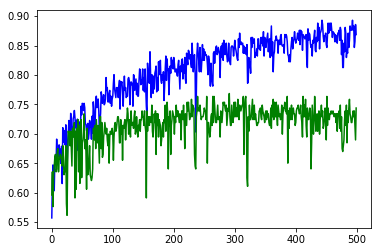

In [70]:
plt.plot(res.history['acc'],'b')
plt.plot(res.history['val_acc'],'g')

In [77]:
def train_val(model, lr=0.001, batch=32, epochs=20): # runtraining with validation holdout
    adam = optimizers.Adam(lr=lr) 
    model.compile(optimizer=adam, loss ='binary_crossentropy', metrics=['accuracy'])
    result = model.fit(X_train, Y_train, batch_size=batch, epochs=epochs,validation_split=0.2, verbose=0)
    return result.history, model

def runeval(model):    
    t0=time.time()
    res, model = train_val(model,lr=0.001,batch=32,epochs=500)
    t1=time.time() #I'm timing to check training time vs model size
    metric = model.evaluate(X_test, Y_test, batch_size=32, verbose=0) 
    print(nlayer, '{:.3f}'.format(t1-t0), model.count_params(),'acc_max_tr:','{:.3f}'.format(max(res['acc'])),'acc_max_val:','{:.3f}'.format(max(res['val_acc'])),'@',np.argmax(res['val_acc']),'acc_test:',metric[1])

for nlayer in [1,5,10,20,50]:
    model = model_nlayer(nlayer)
    runeval(model)

# conclusion: shallow models perform as well as deep ones within 500 epochs when n_neuron=32 for all layers and other hyperparameters
# but the model was trained for long epoch, so it might have passed its optimal point
# We'll see if early stopping helps

1 39.209 321 acc_max_tr: 0.782 acc_max_val: 0.789 @ 463 acc_test: 0.7012987036209601
5 42.688 4545 acc_max_tr: 0.951 acc_max_val: 0.797 @ 212 acc_test: 0.6688311711534277
10 42.618 9825 acc_max_tr: 0.996 acc_max_val: 0.813 @ 94 acc_test: 0.6883116898598609
20 53.187 20385 acc_max_tr: 0.943 acc_max_val: 0.846 @ 169 acc_test: 0.6883116859894294
50 69.118 52065 acc_max_tr: 0.872 acc_max_val: 0.821 @ 350 acc_test: 0.7207792169087893


In [92]:
from keras.callbacks import EarlyStopping
def train_ES(model, lr=0.001, batch=64, epochs=20): # runtraining with validation holdout
    earlystop = EarlyStopping(monitor='val_acc', min_delta=0.01, patience=50, verbose=1, mode='auto')
    callbacks_list = [earlystop]
    adam = optimizers.Adam(lr=lr) 
    model.compile(optimizer=adam, loss ='binary_crossentropy', metrics=['accuracy'])
    result = model.fit(X_train, Y_train, batch_size=batch, epochs=epochs, validation_split=0.2, verbose=0, callbacks=callbacks_list)
    return result.history, model



In [93]:
def evalES(model):    
    t0=time.time()
    res, model = train_ES(model,lr=0.001,batch=64,epochs=500)
    t1=time.time() #I'm timing to check training time vs model size
    metric = model.evaluate(X_test, Y_test, batch_size=32, verbose=0) 
    print(nlayer, '{:.3f}'.format(t1-t0), model.count_params(),'acc_max_tr:','{:.3f}'.format(max(res['acc'])),'acc_max_val:','{:.3f}'.format(max(res['val_acc'])),'@',np.argmax(res['val_acc']),'acc_test:',metric[1])

In [94]:
for nlayer in [1,5,10,20,50]:
    model = model_nlayer(nlayer)
    evalES(model)

Epoch 00133: early stopping
1 12.973 321 acc_max_tr: 0.731 acc_max_val: 0.748 @ 131 acc_test: 0.7597402612884323
Epoch 00090: early stopping
5 11.672 4545 acc_max_tr: 0.794 acc_max_val: 0.772 @ 73 acc_test: 0.7142857158338869
Epoch 00069: early stopping
10 11.451 9825 acc_max_tr: 0.813 acc_max_val: 0.764 @ 18 acc_test: 0.7012987043950465
Epoch 00162: early stopping
20 19.489 20385 acc_max_tr: 0.908 acc_max_val: 0.805 @ 111 acc_test: 0.6818181794959229
Epoch 00156: early stopping
50 22.552 52065 acc_max_tr: 0.815 acc_max_val: 0.797 @ 105 acc_test: 0.7272727241763821


In [100]:
for nlayer in [1,3,5,10,20,50]:
    model = model_nlayer(nlayer)
    evalES(model)
# Early stop may not work well always. It needs tuning for tolerance (min_delta and patience)    

Epoch 00053: early stopping
1 10.494 321 acc_max_tr: 0.666 acc_max_val: 0.634 @ 3 acc_test: 0.6558441597145873
Epoch 00070: early stopping
3 11.617 2433 acc_max_tr: 0.749 acc_max_val: 0.748 @ 55 acc_test: 0.6623376592413172
Epoch 00121: early stopping
5 14.879 4545 acc_max_tr: 0.823 acc_max_val: 0.764 @ 83 acc_test: 0.6558441542959833
Epoch 00137: early stopping
10 16.237 9825 acc_max_tr: 0.878 acc_max_val: 0.789 @ 108 acc_test: 0.6753246776469342
Epoch 00081: early stopping
20 15.093 20385 acc_max_tr: 0.868 acc_max_val: 0.813 @ 71 acc_test: 0.6883116859894294
Epoch 00152: early stopping
50 24.963 52065 acc_max_tr: 0.845 acc_max_val: 0.797 @ 138 acc_test: 0.7142857111893691
